Case Study: Bellabeat Fitness Product Analysis 

This case study is the capstone project of Google Data Analytics certificate.

To analyze data and provide recommendations, this case study will follow key steps of Data Analysis process:

Ask, Prepare, Process, Analyze, Share, Act

**Introduction**

Bellabeat is a high-tech company that manufactures health-focused smart products. This company currently focuses on 5 products: Bellabeat app, leaf, time, spring, and Bellabeat membership. Collecting data on activity, sleep, stress, and reproductive health has allowed Bellabeat to empower women with knowledge about their own health and habits. Since it was founded in 2013, Bellabeat has grown rapidly and quickly positioned itself as a tech-driven wellness company for women.

**Scenario**

You are a junior data analyst working on the marketing analyst team at Bellabeat, a high-tech manufacturer of health-focused products for women. Bellabeat is a successful small company, but they have the potential to become a larger player in the	global smart device market. Urška Sršen, cofounder and Chief Creative Officer of Bellabeat, believes that analyzing smart device fitness data could help unlock new growth opportunities for the company. You have been asked to focus on one of Bellabeat’s products and analyze smart device data to gain insight into how consumers are using their smart devices. The insights you discover will then help guide marketing strategy for the company. You will present your analysis to the Bellabeat executive team along with your high-level recommendations for Bellabeat’s marketing strategy. 

**Phase 1: Ask**

**Business Task**

Analyze FitBit Fitness Tracker Data to gain insights into how consumers use the FitBit devices and identify potential opportunities of growth based on data-driven decisions to guide Bellabeat’s marketing strategies.

**Key Stakeholders**

Urška Sršen: Bellabeat’s cofounder and Chief Creative Officer

Sando Mur: Mathematician and Bellabeat’s co-founder; key member of the Bellabeat executive team

**Following questions to guide the analysis:**

What are some trends in smart device usage? 

How could these trends apply to Bellabeat customers?

How could these trends help influence Bellabeat marketing strategy? 

**Phase 2: Prepare**

**Data Source**

To complete Bellabeat’s business task, I will be using the dataset FitBit Fitness Tracker Data (CC0: Public Domain, dataset made available through Mobius): This Kaggle data set contains personal fitness tracker from thirty fitbit users. Thirty eligible Fitbit users consented to the submission of personal tracker data, including minute-level output for physical activity, heart rate, and sleep monitoring. It includes information about daily activity, steps, and heart rate that can be used to explore users’ habits.

Link: https://www.kaggle.com/datasets/arashnic/fitbit 

This data source will be stored in Microsoft Excel and imported to Microsoft SQL Server Management Studio for data cleaning. To visualize the data, I will be using Tableau to provide meaningful insights with recommendations.

**ROCCC Analysis**

Reliability: MEDIUM - The dataset was collected from 30 FitBit users who consented to the submission of personal tracker data. A larger sample size is preferred for data analysis. 

Original: LOW - Third party data collected using Amazon Mechanical Turk. 

Comprehensive: MEDIUM - Dataset contains multiple fields on daily activities, calories used, daily steps taken, daily sleep time, and weight record.  

Current: LOW - Data source has been generated from March 2016 to May 2016. This dataset is not current and may not be relevant to users current activities. 

Cited: HIGH - Data collector and source is well documented. 

**Phase 3: Process**

It is important to examine, clean and format the data making it useful and accessible to continue with data analysis. In this phase, I will organize data by adding columns, extracting information, removing incorrect data, and converting data types. 

The dataset will be uploaded to Microsoft Excel for data cleaning processes. Excel Power Query will be utilized to merge csv files hourlyCalories, hourlyIntensities, and hourlySteps into a single spreadsheet called hourly_activity. This file will be used for data preparation and analysis. 

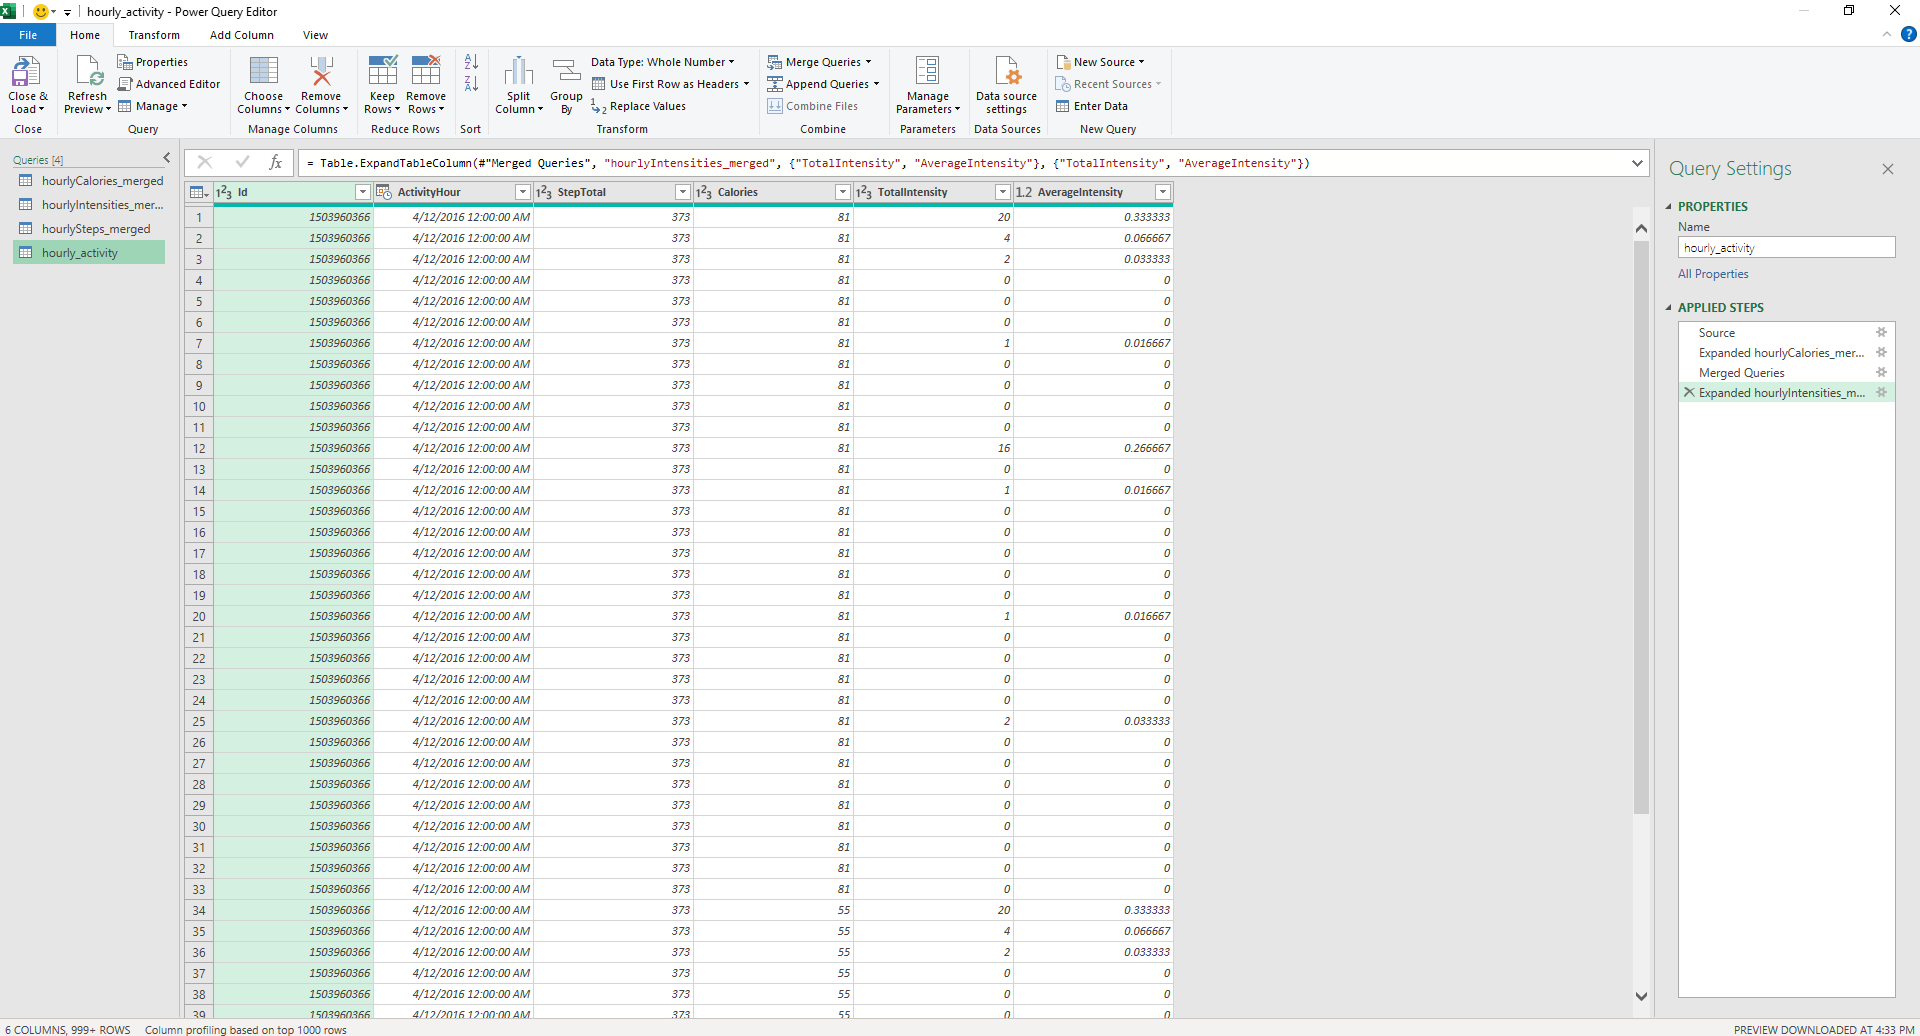

I imported csv files to a database in Microsoft SQL Server Management Studio continuing with data cleaning processes. During this process, I converted data types for each table according to its business requirements, checked for duplicates of queries, removed incorrect data, and created new tables to transform data. I will be using csv files daily_activity, heartrate_seconds, hourly_activity (Power Query), minute_sleep, minute_METs_Narrow, sleep_day, and weight_LogInfo for analysis. 

**Phase 4: Analyze**

In this step, I will be transforming and aggregating data to identify patterns throughout this analysis. There will be a variety of data tables that measure different fitness parameters (daily activities, steps, calories, sleep, time, etc.) organized from processing step. To analyze this dataset, I will perform calculations using Microsoft SQL Server providing results based on  physical activities reported to tracking devices. 

In [1]:
--Calculating number of users and daily averages including users physical activities, average steps, average distance, and average calories.

SELECT 
COUNT(DISTINCT Id) AS users_tracking_activity,
AVG(TotalSteps) AS average_steps,
AVG(TotalDistance) AS average_distance,
AVG(Calories) AS average_calories

FROM Bellabeat.dbo.daily_activity


--Calculating number of users, average, minimum, and maximum heart rates

SELECT
COUNT(DISTINCT Id) AS users_tracking_heart_rate,
AVG(Value) AS average_heart_rate, 
MIN(Value) AS minimum_heart_rate,
MAX(Value) AS maximum_heart_rate

FROM Bellabeat.dbo.heartrate_seconds


--Calculating number of users tracking their sleep patterns including average, minimum, and maximum hours of sleep

SELECT 
COUNT(DISTINCT Id) AS users_tracking_sleep,
COUNT(DISTINCT Id)/33.0*100 AS percentage_users,
AVG(TotalMinutesAsleep)/60 AS average_hours_asleep,
MIN(TotalMinutesAsleep)/60 AS minimum_hours_asleep,
MAX(TotalMinutesAsleep)/60 AS maximum_hours_asleep,
AVG(TotalTimeInBed)/60 AS average_hours_in_bed

FROM Bellabeat.dbo.sleep_day


--Calculating average, minimum, and maximum weight for each user

SELECT 
COUNT(DISTINCT Id) AS users_tracking_weight,
AVG(WeightKg) AS average_weight, 
MIN(WeightKg) AS minimum_weight,
MAX(WeightKg) AS maximum_weight

FROM Bellabeat.dbo.weight_cleaned


--Calculating average heart rate per user

SELECT
Id,
AVG(CAST(Value AS INT)) AS Average_Heart_Rate

FROM Bellabeat.dbo.heartrate_seconds

GROUP BY Id

SyntaxError: invalid syntax (1795672660.py, line 1)

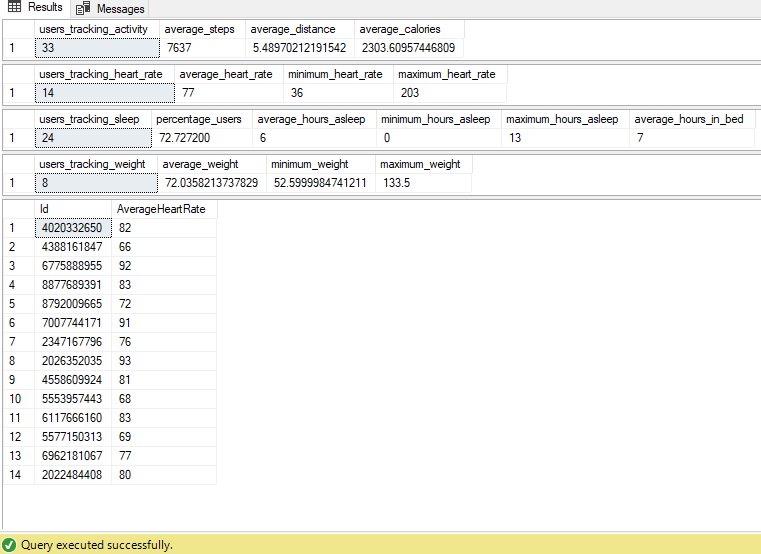

In [ ]:
--Determine time when users were mostly active using average intensity and METs per hour

SELECT
DISTINCT (CAST(ActivityHour AS TIME)) AS activity_time,
AVG(TotalIntensity) OVER (PARTITION BY DATEPART(HOUR, ActivityHour)) AS average_intensity,
AVG(METs/10.0) OVER (PARTITION BY DATEPART(HOUR, ActivityHour)) AS average_METs

FROM Bellabeat.dbo.hourly_activity AS hourly_activity 

JOIN Bellabeat.dbo.minuteMETsNarrow AS METs

ON hourly_activity.Id = METs.Id AND hourly_activity.ActivityHour = METs.ActivityMinute

ORDER BY average_intensity DESC

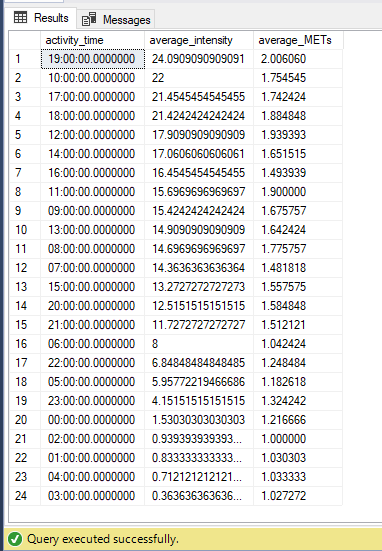

In [ ]:
--Calculate the number of days each user tracked physical activity

SELECT
DISTINCT Id,
COUNT(ActivityDate) OVER (PARTITION BY Id) AS days_activity_recorded

FROM Bellabeat.dbo.daily_activity

ORDER BY days_activity_recorded DESC


--Calculate average minutes for each activity level and total hours device used

SELECT
ROUND(AVG(VeryActiveMinutes),2) AS Average_Very_Active_Minutes,
ROUND(AVG(FairlyActiveMinutes),2) AS Average_Fairly_Active_Minutes,
ROUND(AVG(LightlyActiveMinutes)/60,2) AS Average_Lightly_Active_Hours,
ROUND(AVG(SedentaryMinutes)/60,2) AS Average_Sedentary_Active_Hours,
ROUND((SELECT(SUM(VeryActiveMinutes) + SUM(FairlyActiveMinutes) + SUM(LightlyActiveMinutes) + SUM(SedentaryMinutes))/COUNT(Bellabeat.dbo.daily_activity.Id)
FROM Bellabeat.dbo.daily_activity)/60, 2) AS Average_Hours_Device_Used

FROM Bellabeat.dbo.daily_activity

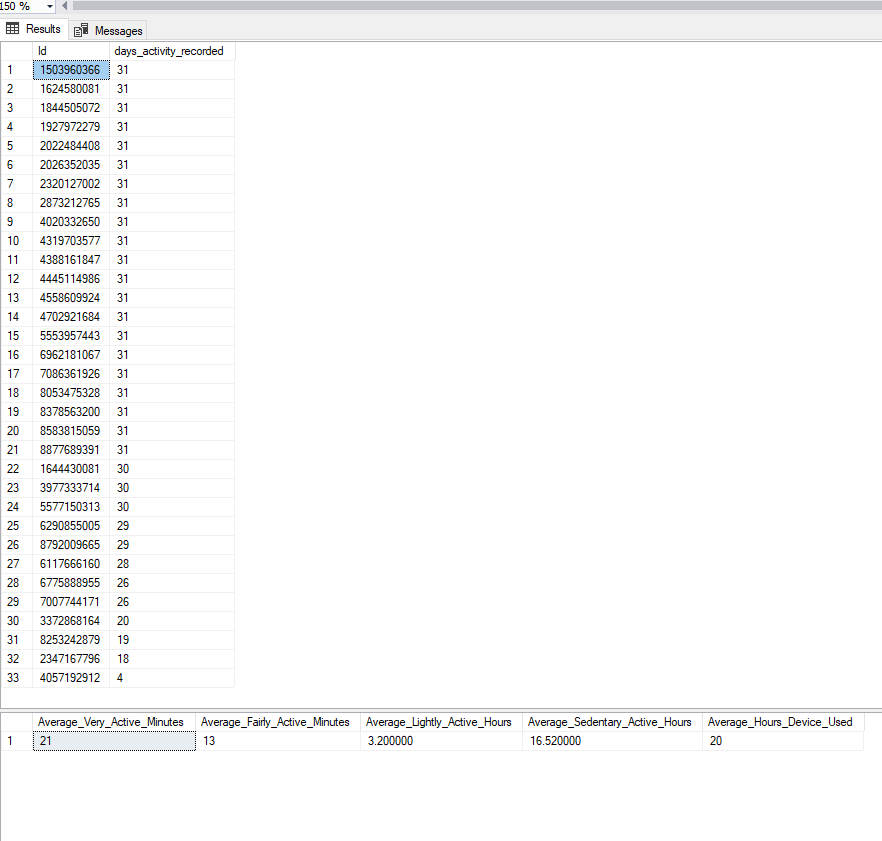

**Observation from analysis:**

* 33 users have submitted their tracking device data that is considered small sample size. 

* Most users utilized their device to track total calories, steps, physical activities, sleep, and heart rates. 

* Users are actively using devices in the afternoon from 12:00 to 15:00

* Users recorded an average of 7600 steps a day which is below the recommended steps.

* 73% of participants that tracked their sleeping pattern received the recommended amount of sleep (more than 7 hours).

* 42% of participants that tracked their heart rate are at normal levels. Minor spikes of heart rate (Min 36 beats per minute and Max 203 beats per minute). 

* Majority of participants are inactive (sedentary) with using tracking devices to check their health habits.


**Phase 5: Share**

In this step, I will create a data visualization using Tableau to provide high-level insights and findings based on this analysis. 

On average, participants used their devices for 20 hours 18 minutes a day (refer to Figure 4 below). They spend 81% of those hours being physically inactive (sedentary active). Sedentary activities can include watching television, using a computer at the office, sitting while commuting or sleeping. When adjusting for sleep, participants spent 78% while awake being inactive, that is 8 hours 50 minutes of being inactive a day (16.47 hours total sedentary hours minus 7.63 hours of time in bed). 

They spent over 3 hours (16%) doing light activities which can include walking slowly, shopping, washing dishes or preparing food. They spent 13 minutes being fairly active which can include cleaning the house, walking fast, slow dancing or shooting a basketball. About 21 minutes were spent doing vigorous activities like running, swimming,  jumping, or carrying heavy loads. From the data it is evident that most of the users spend most of their day at work doing less physical activities. They spend less than half an hour a day exercising or doing vigorous activities.

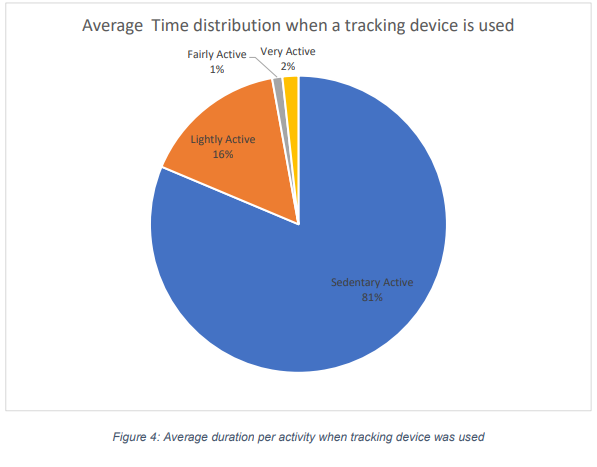

Figure 5 below shows the time when the participants were mostly active by displaying average hourly intensity. Intensity is a measure for the physical activity used by the fitabase dataset. It is classified as following: 

• 0 = Sedentary

• 1 = Light 

• 2 = Moderate 

• 3 = Very Active 

To get the total intensity these values are added up for all respondents in a particular hour and then divided by the number of respondents to get the average. Higher average intensity implies that they are more physically active. 

The average hourly intensity is above 21 from 17:00 to after 19:00 but drops from 20:00 onwards. This means most participants were involved in vigorous physical activity from 5PM to just before 8 PM. Second highest average intensity is from 12:00 to after 14:00. Another pattern observed is that activity starts picking up slowly from 5 AM and reaches the peak at 12PM falls slightly.

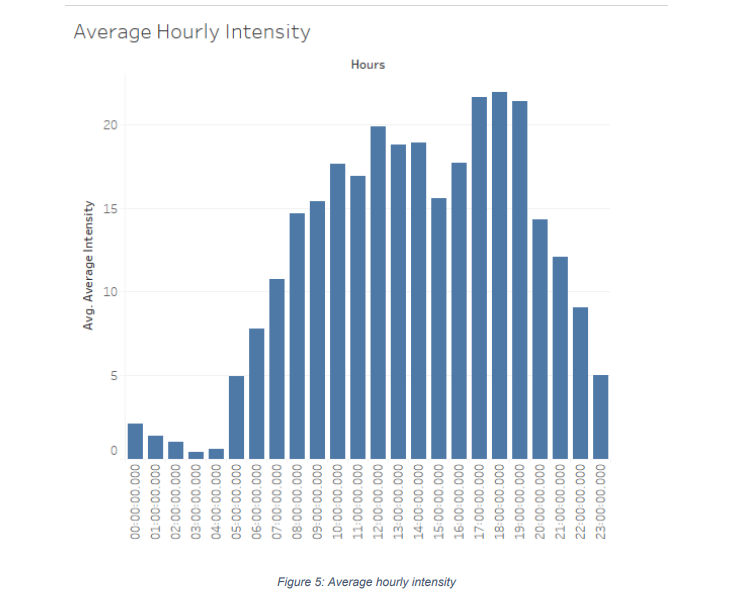

Average intensities are paired with METs which stand for metabolic equivalents. MET is defined as the amount of oxygen consumed while at rest, that is 1 MET. For example, 2 MET means a person is consuming two times the amount of oxygen consumed while at rest. Classifications of METs are as follows: 

• Less than 3 METs are light activities 

• 3 to 6 METS are Moderate activities 

• 6 METs or more are vigorous activities 

Highest MET recorded is 15.7 however on average the maximum MET is less than 2 METs because only a few minutes were spent doing physical activities. Participants clocked an average of 7600 steps a day which is about 5.5 km a day and burnt an average of 2300 kilocalories a day (estimated energy expenditure). Only 7 participants traveled more than 10000 steps a day (8 km) on average (refer to Figure 6 below) which is the recommended steps per day.


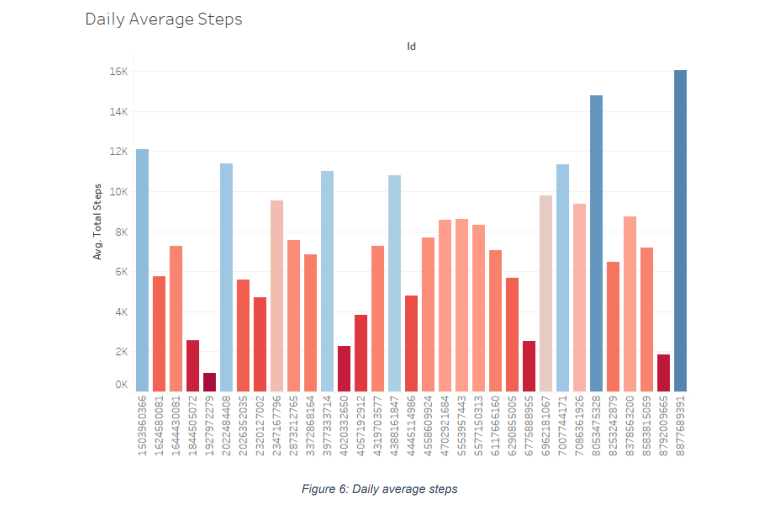



**Phase 6: Act**

In the final step, I will be delivering insights and recommendations to improve Bellabeat’s marketing strategy. 

1. What are the trends identified?

    * Majority of users are using the FitBit app to track sedentary activities and not using it for tracking their health habits. This trend is based on the amount of time tracking devices are used.

    * All users have tracked total calories, steps, physical activities, sleep, and heart rates. 

2. How could these trends apply to Bellabeat customers?

    * Bellabeat develops products focused on providing women with their health, habit and fitness data and encouraging them to understand their current habits and make healthy decisions. These common trends surrounding health and fitness can be applied to Bellabeat customers.


3. How could these trends help influence Bellabeat marketing strategy?

    * Bellabeat marketing team can encourage users by educating them with knowledge about fitness benefits, suggest different types of exercise (ie. simple 10 minutes exercise on weekday and a more intense exercise on weekends) and calories intake and burnt rate information on the Bellabeat app.

   * On weekends, Bellabeat app can also prompt notifications to encourage users to exercise.

**Recommendations**

After performing the collection, transformation, cleaning, organization and analysis of the given dataset, we have enough factual evidence to suggest answers to the business-related questions that were asked.

We can infer that the duration and level of intensity of the activities performed are greatly dependent on the amount of calories burned. METs provide a great insight on the intensity of activities performed and amount of calories burned per minute. While most of the participants gained adequate amounts of sleep, it is noticed that a small fraction of the users either oversleep or undersleep. Users are also more likely to perform low-high intensity activities in the range of 7:00 AM - 8:00 PM throughout the day.

In order to implement new marketing strategies to focus on unlocking new growth opportunities and develop the business, we have to refer to the analysis provided above. The recommendations I would provide to help solve this business-related scenario are shown below.

Top Recommendations to improve Bellabeat’s marketing strategy:

  * Obtain more data from reliable sources for an accurate analysis on fitness tracker.
    
  * Provide health campaigns that encourage a healthy lifestyle. Provide its clients with comprehensive health information by showing how different health metrics work together.
    
  * Highlight MET tracking feature on smart devices as a marketing strategy and create awareness on MET values. It allows users to track their level of intensity of activities and provide a real time insight on how much calories they burn every minute.
    
  * Participants seem to spend most of their time inactive and live a sedentary lifestyle. Notifying users through smart device notifications during the most popular time for performing activities which is between 7:00 AM - 8:00 PM can remind people to exercise and live a more active lifestyle.
    
  * Provide app notification for users to remind them to get sufficient sleep every day and implement new sleep measurement features or products such as tracking Rapid Eye Movement (REM) sleep.
    
  * Consider setting daily/weekly calorie challenges and award points to users based on their activity with Bellabeat application. Points can be accumulated and redeemed as a discount for their next product purchase.
